In [7]:
import pandas as pd
import numpy as np
import seaborn as sns 
import matplotlib.pyplot as plt

In [9]:
df = pd.read_csv('../data/netflix_titles.csv')
df.head()

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description
0,s1,Movie,Dick Johnson Is Dead,Kirsten Johnson,NaN,United States,"September 25, 2021",2020,PG-13,90 min,Documentaries,"As her father nears the end of his life, filmm..."
1,s2,TV Show,Blood & Water,NaN,"Ama Qamata, Khosi Ngema, Gail Mabalane, Thaban...",South Africa,"September 24, 2021",2021,TV-MA,2 Seasons,"International TV Shows, TV Dramas, TV Mysteries","After crossing paths at a party, a Cape Town t..."
2,s3,TV Show,Ganglands,Julien Leclercq,"Sami Bouajila, Tracy Gotoas, Samuel Jouy, Nabi...",NaN,"September 24, 2021",2021,TV-MA,1 Season,"Crime TV Shows, International TV Shows, TV Act...",To protect his family from a powerful drug lor...
3,s4,TV Show,Jailbirds New Orleans,NaN,NaN,NaN,"September 24, 2021",2021,TV-MA,1 Season,"Docuseries, Reality TV","Feuds, flirtations and toilet talk go down amo..."
4,s5,TV Show,Kota Factory,NaN,"Mayur More, Jitendra Kumar, Ranjan Raj, Alam K...",India,"September 24, 2021",2021,TV-MA,2 Seasons,"International TV Shows, Romantic TV Shows, TV ...",In a city of coaching centers known to train I...


In [10]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8807 entries, 0 to 8806
Data columns (total 12 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   show_id       8807 non-null   object
 1   type          8807 non-null   object
 2   title         8807 non-null   object
 3   director      6173 non-null   object
 4   cast          7982 non-null   object
 5   country       7976 non-null   object
 6   date_added    8797 non-null   object
 7   release_year  8807 non-null   int64 
 8   rating        8803 non-null   object
 9   duration      8804 non-null   object
 10  listed_in     8807 non-null   object
 11  description   8807 non-null   object
dtypes: int64(1), object(11)
memory usage: 825.8+ KB


In [12]:
df.isnull().sum()

show_id            0
type               0
title              0
director        2634
cast             825
country          831
date_added        10
release_year       0
rating             4
duration           3
listed_in          0
description        0
dtype: int64

In [13]:
df.duplicated().sum()

np.int64(0)

In [14]:
df['date_added'] = pd.to_datetime(df['date_added'], errors = 'coerce')

In [15]:
df['date_added'].head()

0   2021-09-25
1   2021-09-24
2   2021-09-24
3   2021-09-24
4   2021-09-24
Name: date_added, dtype: datetime64[ns]

In [16]:
df['year_added'] = df['date_added'].dt.year

In [17]:
df[['date_added', 'year_added']].head()

,date_added,year_added
0,2021-09-25,2021.0
1,2021-09-24,2021.0
2,2021-09-24,2021.0
3,2021-09-24,2021.0
4,2021-09-24,2021.0


In [19]:
df['duration'].head(10)

0       90 min
1    2 Seasons
2     1 Season
3     1 Season
4    2 Seasons
5     1 Season
6       91 min
7      125 min
8    9 Seasons
9      104 min
Name: duration, dtype: object

In [22]:
df['duration_type'] = df['duration'].astype(str).apply(lambda x: 'min' if 'min' in x else 'season')

In [23]:
df['duration_value'] = (df['duration'].astype(str).str.split().str[0].astype('float'))

In [24]:
df[['type', 'duration', 'duration_type', 'duration_value']].head(10)

,type,duration,duration_type,duration_value
0,Movie,90 min,min,90.0
1,TV Show,2 Seasons,season,2.0
2,TV Show,1 Season,season,1.0
3,TV Show,1 Season,season,1.0
4,TV Show,2 Seasons,season,2.0
5,TV Show,1 Season,season,1.0
6,Movie,91 min,min,91.0
7,Movie,125 min,min,125.0
8,TV Show,9 Seasons,season,9.0
9,Movie,104 min,min,104.0


In [28]:
df = df.dropna(subset=['year_added'])

In [30]:
df['year_added'] = df['year_added'].astype(int)

In [31]:
grouped = df.groupby(['year_added', 'type']).size().reset_index(name='count')

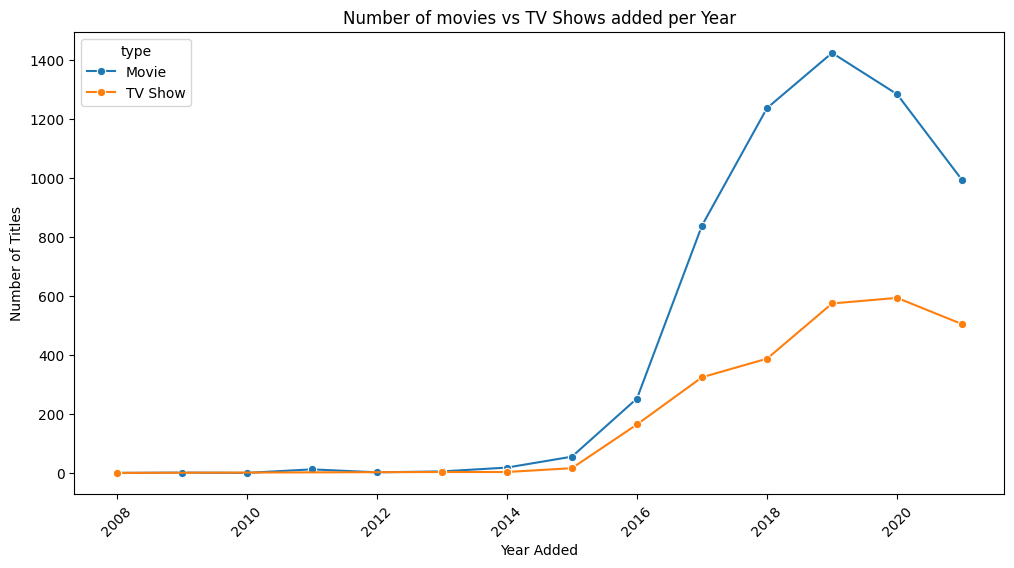

In [ ]:
plt.figure(figsize=(12,6))
sns.lineplot(data=grouped,x='year_added', y = 'count', hue='type', marker='o')

plt.title("Number of movies vs TV Shows added per Year")
plt.xlabel("Year Added")
plt.ylabel("Number of Titles")
plt.xticks(rotation=45)
plt.tight_layout

plt.show()